In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
X = pd.read_csv('RawData.csv')

In [6]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,1,1:26402.070400,2:2.532401,3:5.411209,4:6.509906,5:7.658469,6:-4.722217,7:-5.817651,8:-7.518333,9:23855.781200,...,119:-1.530519,120:-1.994993,121:4176.445300,122:4.281373,123:0.980205,124:1.628050,125:1.951172,126:-0.889333,127:-1.323505,128:-1.749225
1,1,1:42103.582000,2:3.454189,3:8.198175,4:10.508439,5:11.611003,6:-7.668313,7:-9.478675,8:-12.230939,9:37562.300800,...,119:-2.384784,120:-2.867291,121:5914.668500,122:5.396827,123:1.403973,124:2.476956,125:3.039841,126:-1.334558,127:-1.993659,128:-2.348370
2,1,1:42825.988300,2:3.451192,3:12.113940,4:16.266853,5:39.910056,6:-7.849409,7:-9.689894,8:-11.921704,9:38379.066400,...,119:-2.607199,120:-3.058086,121:6147.474400,122:5.501071,123:1.981933,124:3.569823,125:4.049197,126:-1.432205,127:-2.146158,128:-2.488957
3,1,1:58151.175700,2:4.194839,3:11.455096,4:15.715298,5:17.654915,6:-11.083364,7:-13.580692,8:-16.407848,9:51975.589900,...,119:-3.594763,120:-4.181920,121:8158.644900,122:7.174334,123:1.993808,124:3.829303,125:4.402448,126:-1.930107,127:-2.931265,128:-4.088756
4,1,1:79872.130800,2:5.553595,3:18.690482,4:27.191770,5:28.636972,6:-15.054684,7:-18.399695,8:-23.376017,9:69637.275400,...,119:-5.092170,120:-5.657237,121:10731.963200,122:8.900291,123:3.002584,124:5.620025,125:6.530042,126:-2.688513,127:-4.173558,128:-4.808914


In [7]:
X = X[1:]
X.reset_index(inplace=True)
X.drop(labels='index',axis=1,inplace=True)
#print(X.columns.tolist())
Z=X['0']
X.drop('0',axis=1,inplace=True)
C=0
for i in range(1,17):
    for j in range(1,9):   
        C+=1
        C_Name = 'S'+str(i)+'F'+str(j)
        X = X.rename(columns={str(C):C_Name})
newdf = pd.DataFrame()
for col in X.columns.tolist():
    newdf[col] = X[col].apply(lambda x:x.split(':')[1])
newdf['ClassNumber'] = Z
X=newdf
# Converting dtypes of columns to float
for col in X.columns.tolist():
    newdf[col]=X[col].astype('float64')
X=newdf
X.head()

,S1F1,S1F2,S1F3,S1F4,S1F5,S1F6,S1F7,S1F8,S2F1,S2F2,...,S15F8,S16F1,S16F2,S16F3,S16F4,S16F5,S16F6,S16F7,S16F8,ClassNumber
0,42103.5820,3.454189,8.198175,10.508439,11.611003,-7.668313,-9.478675,-12.230939,37562.3008,2.840403,...,-2.867291,5914.6685,5.396827,1.403973,2.476956,3.039841,-1.334558,-1.993659,-2.348370,1.0
1,42825.9883,3.451192,12.113940,16.266853,39.910056,-7.849409,-9.689894,-11.921704,38379.0664,2.851173,...,-3.058086,6147.4744,5.501071,1.981933,3.569823,4.049197,-1.432205,-2.146158,-2.488957,1.0
2,58151.1757,4.194839,11.455096,15.715298,17.654915,-11.083364,-13.580692,-16.407848,51975.5899,3.480866,...,-4.181920,8158.6449,7.174334,1.993808,3.829303,4.402448,-1.930107,-2.931265,-4.088756,1.0
3,79872.1308,5.553595,18.690482,27.191770,28.636972,-15.054684,-18.399695,-23.376017,69637.2754,4.365858,...,-5.657237,10731.9632,8.900291,3.002584,5.620025,6.530042,-2.688513,-4.173558,-4.808914,1.0
4,94981.5859,5.872932,22.318174,32.673187,34.308656,-18.198780,-22.253267,-27.061036,82237.3906,4.791826,...,-7.132363,12925.3449,10.103240,3.604875,6.913722,7.949838,-3.407223,-5.363093,-5.870612,1.0


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13899 entries, 0 to 13898
Columns: 129 entries, S1F1 to ClassNumber
dtypes: float64(129)
memory usage: 13.7 MB


In [9]:
X.describe()

,S1F1,S1F2,S1F3,S1F4,S1F5,S1F6,S1F7,S1F8,S2F1,S2F2,...,S15F8,S16F1,S16F2,S16F3,S16F4,S16F5,S16F6,S16F7,S16F8,ClassNumber
count,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,...,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000,13899.000000
mean,50440.862510,6.633490,12.938059,18.745466,26.895609,-9.158785,-14.404150,-59.954417,57353.411054,6.644511,...,-19.139164,19688.732976,6.070479,7.138836,14.928734,19.090857,-4.901154,-8.168167,-16.091969,3.389093
std,69862.081396,13.482189,17.613410,24.903025,38.117494,12.731334,21.309780,131.063778,64061.619217,15.585765,...,26.524102,14279.429651,4.638921,5.247386,12.433181,14.386540,4.195162,7.637884,20.963917,1.728345
min,-16757.598600,0.088287,0.000100,0.000100,0.000100,-131.332873,-227.627758,-1664.735576,-16119.460900,0.185164,...,-482.278033,-8297.548800,0.712112,0.003238,0.011488,0.118849,-30.205911,-58.844076,-410.152297,1.000000
25%,6693.275900,2.284466,1.631904,2.383819,4.966172,-11.581948,-17.290838,-48.501993,13285.071750,2.776879,...,-22.362044,8840.154500,3.007385,3.061267,5.410023,8.040496,-6.789401,-11.161517,-18.942715,2.000000
50%,19362.784000,3.870881,4.980553,7.251416,11.687227,-3.338607,-4.957228,-14.044258,37766.556600,4.734662,...,-13.528549,16314.344200,4.975476,5.809596,11.325930,14.566378,-3.881820,-6.306841,-11.747502,3.000000
75%,63086.927450,8.400259,17.189155,26.409723,34.842704,-1.126849,-1.668662,-5.211711,70304.998800,8.608397,...,-7.358460,26999.450900,7.387769,10.220047,21.204688,26.545015,-1.804604,-2.877327,-6.432564,5.000000
max,670687.347700,1339.879283,167.079751,226.619457,993.605306,-0.006941,22.201589,115.273147,502202.812500,1672.363221,...,11.516418,96706.792700,45.574835,32.203601,297.225880,195.242555,-0.003817,6.851792,8.357968,6.000000


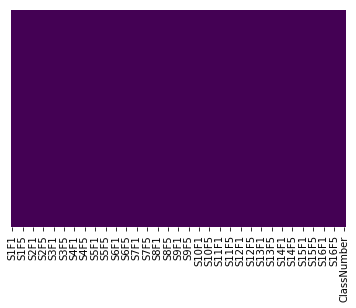

In [12]:
# Null Value Analysis
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can infer from above that there are no missing values

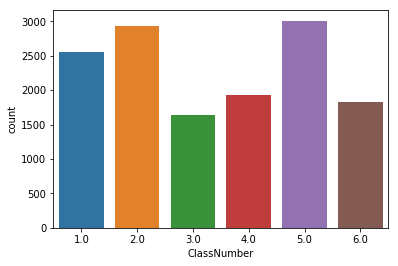

In [13]:
#plot to see number of records for each class
sns.countplot(x=X['ClassNumber'])

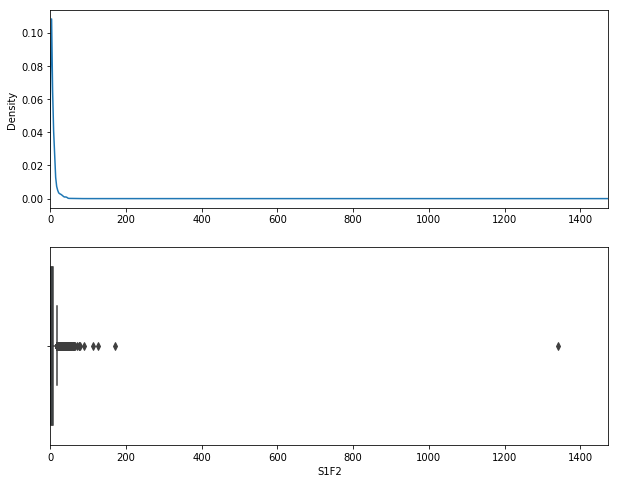

In [14]:
#Checking for outliers
i = 'S1F2'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(X[i].min(), X[i].max()*1.1)
 
ax = X[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(X[i].min(), X[i].max()*1.1)
sns.boxplot(x=X[i])

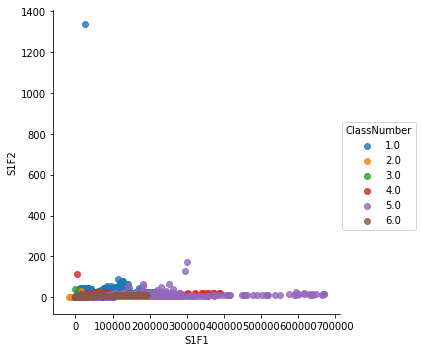

In [15]:
sns.lmplot(x='S1F1',y='S1F2',data = X,hue = 'ClassNumber',fit_reg=False)

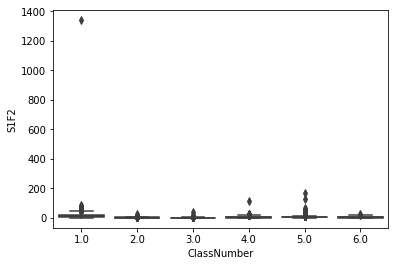

In [16]:
sns.boxplot(x="ClassNumber", y="S1F2", data=X)

In [17]:
# Replacing outliers with median values
for i in X.columns.tolist()[:-1]:
    
    q75, q25 = np.percentile(X[i].dropna(), [75 ,25])
    iqr = q75 - q25

    #Find min and max values in iqr 
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    #Get Median Value
    median = X[i].median()
    #Replace +ve and -ve outliers with median values
    X.loc[X[i] > max, i] = np.nan
    X.loc[X[i] < min, i] = np.nan
    X.fillna(median,inplace=True)

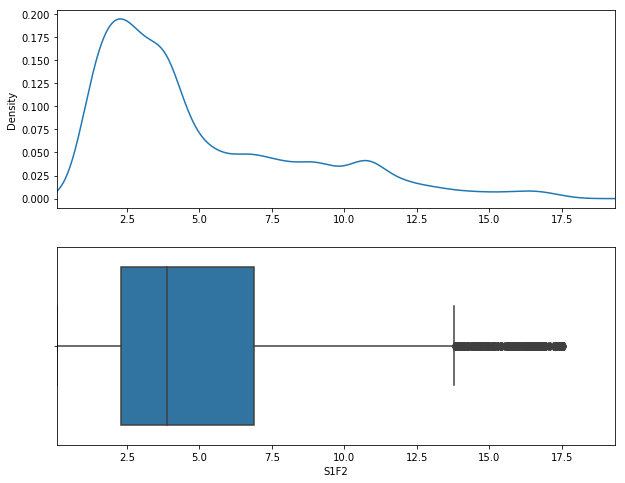

In [18]:
i = 'S1F2'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(X[i].min(), X[i].max()*1.1)
 
ax = X[i].plot(kind='kde')
 
plt.subplot(212)
plt.xlim(X[i].min(), X[i].max()*1.1)
sns.boxplot(x=X[i])

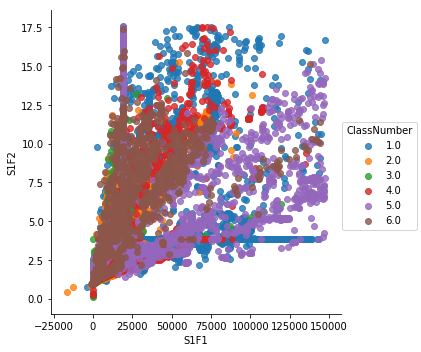

In [19]:
sns.lmplot(x='S1F1',y='S1F2',data = X,hue = 'ClassNumber',fit_reg=False)

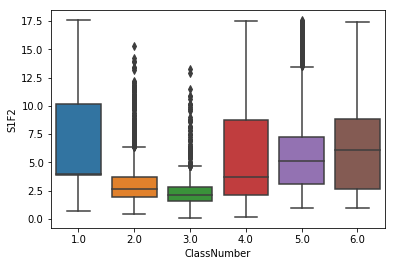

In [20]:
sns.boxplot(x="ClassNumber", y="S1F2", data=X)

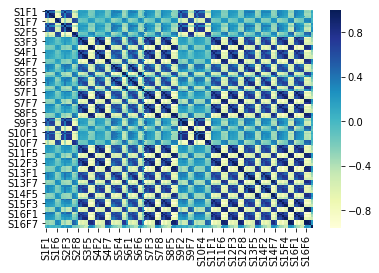

In [25]:
sns.heatmap(X.corr(),cmap="YlGnBu")